# Telecome operator research- plan profitability comparisson
The telecom operator Megaline wished to compare 2 package plans, Surf and Ultimate, and asses which one is more proffitable with the help of this study.

## Data PreProcessing

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 
try:
    calls= pd.read_csv('megaline_calls.csv')
    internet= pd.read_csv('megaline_internet.csv')
    messages= pd.read_csv('megaline_messages.csv')
    plans= pd.read_csv('megaline_plans.csv')
    users= pd.read_csv('megaline_users.csv')
except:
    calls=pd.read_csv('/datasets/megaline_calls.csv')
    internet= pd.read_csv('/datasets/megaline_internet.csv')
    messages= pd.read_csv('/datasets/megaline_messages.csv')
    plans= pd.read_csv('/datasets/megaline_plans.csv')
    users= pd.read_csv('/datasets/megaline_users.csv')



In [2]:
def df_review(data):
    i=0
    for name, df in data.items():
        i+=1
        print('{0}) {1}:\n\n{2}\n '.format(i, name, df.head()))
        print('number of duplicared entries in {0}: {1}\n'.format(name, df.duplicated().sum()))
        df.info()
        print('\n\n')

In [3]:
df_review({'calls':calls})

1) calls:

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
 
number of duplicared entries in calls: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB





In [4]:
calls.call_date= pd.to_datetime(calls.call_date, format='%Y-%m-%d')
calls.rename(columns={'duration': 'duration_min'}, inplace=True)
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            137735 non-null  object        
 1   user_id       137735 non-null  int64         
 2   call_date     137735 non-null  datetime64[ns]
 3   duration_min  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [5]:
missed_calls= calls.query('duration_min==0')
missed_calls

,id,user_id,call_date,duration_min
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


In [6]:
print('The percentage of missed calls from all calls:', round((missed_calls.shape[0]/calls.shape[0])*100,1))

The percentage of missed calls from all calls: 19.5


- dropping missed-calls:

In [7]:
calls= calls.drop(missed_calls.index).reset_index(drop=True)
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110901 entries, 0 to 110900
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            110901 non-null  object        
 1   user_id       110901 non-null  int64         
 2   call_date     110901 non-null  datetime64[ns]
 3   duration_min  110901 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.4+ MB


- rounding up call minutes:

In [8]:
calls.duration_min= np.ceil(calls.duration_min)

In [9]:
calls.head()

,id,user_id,call_date,duration_min
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


In [10]:
df_review({'internet':internet})

1) internet:

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
 
number of duplicared entries in internet: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB





In [11]:
internet.session_date= pd.to_datetime(internet.session_date, format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [12]:
zero_mb= internet.query('mb_used==0')
zero_mb

,id,user_id,session_date,mb_used
1,1000_204,1000,2018-12-31,0.0
14,1001_26,1001,2018-09-17,0.0
16,1001_28,1001,2018-10-17,0.0
34,1001_54,1001,2018-09-02,0.0
43,1001_77,1001,2018-10-31,0.0
...,...,...,...,...
104797,1499_192,1499,2018-09-19,0.0
104804,1499_199,1499,2018-12-09,0.0
104816,1499_211,1499,2018-09-26,0.0
104817,1499_212,1499,2018-09-11,0.0


In [13]:
print('The percentage of zero usage (MB) internet sessions out of total sessions:', round((zero_mb.shape[0]/internet.shape[0])*100,1))

The percentage of zero usage (MB) internet sessions out of total sessions: 13.1


- dropping zero usage sessions:

In [14]:
internet= internet.drop(zero_mb.index).reset_index(drop=True)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91078 entries, 0 to 91077
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  object        
 1   user_id       91078 non-null  int64         
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.8+ MB


In [15]:
df_review({'messages':messages})

1) messages:

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
 
number of duplicared entries in messages: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB





In [16]:
messages.message_date= pd.to_datetime(messages.message_date, format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [17]:
df_review({'plans':plans})

1) plans:

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
 
number of duplicared entries in plans: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   

In [18]:
df_review({'users':users})

1) users:

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
 
number of duplicared entries in users: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  5

In [19]:
churned= users.query('~churn_date.isna()')
active= users.query('churn_date.isna()')
print('percentage of churned out of all users: {:.1%}'.format(churned.shape[0]/users.shape[0]))

percentage of churned out of all users: 6.8%


In [20]:
users['reg_date']= pd.to_datetime(users.reg_date, format='%Y-%m-%d')
users['churn_date']= pd.to_datetime(users.churn_date, format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


- length of subscription:

In [21]:
users['days_subscribed']= (users.churn_date- users.reg_date).dt.days

In [22]:
users.sample(5, random_state=1)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,days_subscribed
304,1304,Dominque,Cole,69,"Birmingham-Hoover, AL MSA",2018-10-28,ultimate,NaT,NaN
340,1340,Vanna,Stanton,65,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-05,surf,NaT,NaN
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaT,NaN
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,61.0
479,1479,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,surf,NaT,NaN


## Data Analysis

- calls duration per calendar month:

In [23]:
calls['month']= calls.call_date.dt.month
number_calls_minutes= calls.pivot_table(index=['user_id', 'month'], values='duration_min', aggfunc=('count', 'sum')).reset_index()
number_calls_minutes.rename(columns={'count':'calls_per_month', 'sum':'minutes_per_month'}, inplace=True)
number_calls_minutes.head()

,user_id,month,calls_per_month,minutes_per_month
0,1000,12,16,124.0
1,1001,8,22,182.0
2,1001,9,38,315.0
3,1001,10,47,393.0
4,1001,11,49,426.0


- text messages per calendar month: 

In [24]:
messages['month']= messages.message_date.dt.month
number_messages= messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
number_messages.rename(columns={'id':'messages_per_month'}, inplace=True)
number_messages.head()

,user_id,month,messages_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


- internet use per calendar month- converted to GB by deviding the mb_used/1024 and rounding up, according to company's policy:

In [25]:
internet['month']= internet.session_date.dt.month
volume_internet= internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
volume_internet.mb_used= np.ceil(volume_internet.mb_used/1024)
volume_internet.rename(columns={'mb_used':'GB_per_month'}, inplace=True)
volume_internet.head()

,user_id,month,GB_per_month
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0


In [26]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,days_subscribed
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,NaN


- merging all monthly data:

In [27]:
revenue_per_month= users.merge(number_calls_minutes.merge(number_messages, on=['user_id','month'], how='outer').merge(volume_internet, on=['user_id', 'month'],how='outer'), on='user_id', how='outer')

- replacing NaNs with '0' where relevant i.e. no use of text/ calls/ internet service

In [28]:
revenue_per_month.calls_per_month= revenue_per_month.calls_per_month.fillna(0)
revenue_per_month.minutes_per_month= revenue_per_month.minutes_per_month.fillna(0)
revenue_per_month.messages_per_month= revenue_per_month.messages_per_month.fillna(0)
revenue_per_month.GB_per_month= revenue_per_month.GB_per_month.fillna(0)


In [29]:
revenue_per_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             2303 non-null   int64         
 1   first_name          2303 non-null   object        
 2   last_name           2303 non-null   object        
 3   age                 2303 non-null   int64         
 4   city                2303 non-null   object        
 5   reg_date            2303 non-null   datetime64[ns]
 6   plan                2303 non-null   object        
 7   churn_date          160 non-null    datetime64[ns]
 8   days_subscribed     160 non-null    float64       
 9   month               2293 non-null   float64       
 10  calls_per_month     2303 non-null   float64       
 11  minutes_per_month   2303 non-null   float64       
 12  messages_per_month  2303 non-null   float64       
 13  GB_per_month        2303 non-null   float64     

In [30]:
revenue_per_month.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,days_subscribed,month,calls_per_month,minutes_per_month,messages_per_month,GB_per_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaN,12.0,16.0,124.0,11.0,2.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,8.0,22.0,182.0,30.0,7.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,9.0,38.0,315.0,44.0,14.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,10.0,47.0,393.0,53.0,22.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,11.0,49.0,426.0,36.0,19.0


In [31]:
def revenue_calc(row):
    ''' function to calculate the revenue according to type of plan'''
    plan= row['plan']
    if plan=='surf':
        revenue=20
        if row['calls_per_month']>500:
           revenue+= (row['calls_per_month']-500)*0.03
        if row['messages_per_month']>50:
            revenue+= (row['messages_per_month']-50)*0.03
        if row['GB_per_month']>15:
            revenue+= (row['GB_per_month']-15)*10
    
    if plan=='ultimate':
        revenue=70
        if row['calls_per_month']>3000:
            revenue+= (row['calls_per_month']-3000)*0.01
        if row['messages_per_month']>1000:
            revenue+= (row['messages_per_month']-1000)*0.01
        if row['GB_per_month']>30:
            revenue+= (row['GB_per_month']-30)*7

    return revenue
        

- monthly revenue calculation:

In [32]:
revenue_per_month['monthly_revenue']= revenue_per_month.apply(revenue_calc, axis=1)
revenue_per_month.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,days_subscribed,month,calls_per_month,minutes_per_month,messages_per_month,GB_per_month,monthly_revenue
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaN,12.0,16.0,124.0,11.0,2.0,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,8.0,22.0,182.0,30.0,7.0,20.00
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,9.0,38.0,315.0,44.0,14.0,20.00
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,10.0,47.0,393.0,53.0,22.0,90.09
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,11.0,49.0,426.0,36.0,19.0,60.00


- average monthly revenue of call_minutes, messages and internet use (GB), per user:

In [33]:
plan_users= revenue_per_month.pivot_table(index=['plan', 'user_id'], values=['minutes_per_month', 'messages_per_month', 'GB_per_month','monthly_revenue'], aggfunc='mean').reset_index()
plan_users.rename(columns={'monthly_revenue':'mean_monthly_revenue'}, inplace=True)
plan_users.head()

,plan,user_id,GB_per_month,messages_per_month,minutes_per_month,mean_monthly_revenue
0,surf,1001,16.200000,41.400000,345.600000,50.018000
1,surf,1002,13.666667,29.333333,276.333333,33.333333
2,surf,1003,27.000000,50.000000,1104.000000,140.000000
3,surf,1004,19.625000,22.125000,346.500000,76.250000
4,surf,1005,17.000000,11.000000,496.000000,40.000000


In [34]:
print('Ratio distribution of users between the 2 plans: ')
plan_users.plan.value_counts(normalize=True)

Ratio distribution of users between the 2 plans: 


surf        0.678
ultimate    0.322
Name: plan, dtype: float64

- the 500 users in this sample set are not evenly distributed between the two payment plans: 339 are enrolled in the 'surf' plan, and 161 are enrolled in the 'ultimate' plan: 2/3 and 1/3, respectively. 

#### Internet use analysis

In [35]:
plan_users.groupby('plan')['GB_per_month'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,339.0,15.713833,6.406767,0.0,12.5,16.000000,19.0,44.000000
ultimate,161.0,15.753484,6.241980,0.0,12.2,15.666667,19.0,35.090909


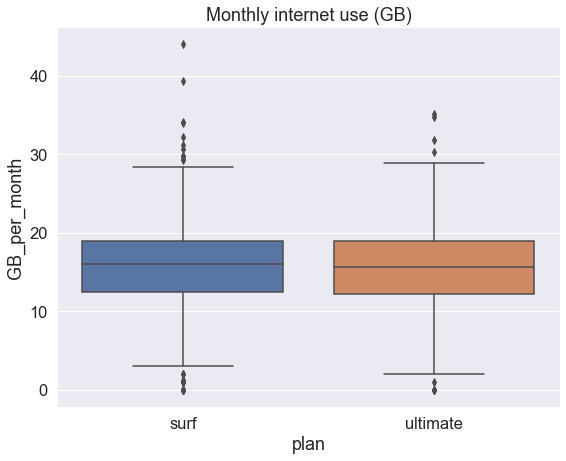

In [36]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set(font_scale=1.5)
sns.boxplot(data=plan_users,x='plan' , y='GB_per_month').set(title='Monthly internet use (GB)')
plt.show()

- The mean monthly internet use (GB) in both plans is almost identical (15.71 'surf' vs 15.75 'ultimate').
- Almost 50% of the 'surf' users exceed their plan allowance wheras only less than 1% of the 'ultimate' plan users exceed theirs. 

#### Text messages analysis

In [37]:
plan_users.groupby('plan')['messages_per_month'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,339.0,31.835321,31.03770,0.0,5.166667,26.500000,48.1,159.0
ultimate,161.0,37.515718,33.06331,0.0,9.000000,32.142857,60.0,148.0


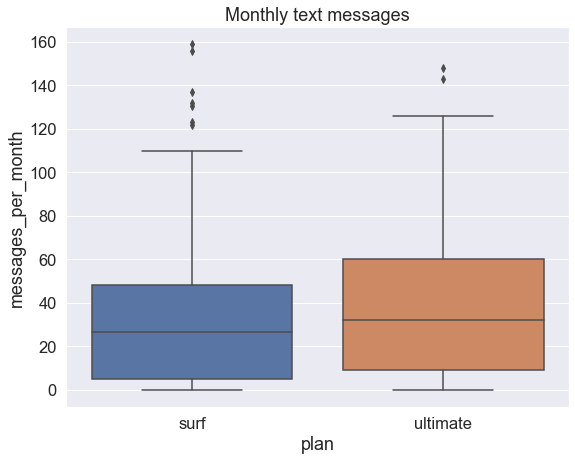

In [38]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set(font_scale=1.5)
sns.boxplot(data=plan_users,x='plan' , y='messages_per_month').set(title='Monthly text messages')
plt.show()

- The mean monthly text messages of the 'ultimate' plan users is slightly higher than that of the 'surf' plan users (37.5 vs 31.8 respectively). 
- about 25% of the 'surf' plan users exceed their text messages allowance whereas non of the 'ultimate' users exceed theirs. 

#### Call minutes analysis

In [39]:
plan_users.groupby('plan')['minutes_per_month'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,339.0,401.502754,204.830791,0.0,285.25,391.0,533.166667,1104.000000
ultimate,161.0,397.824227,207.838424,0.0,261.00,406.0,511.500000,1054.571429


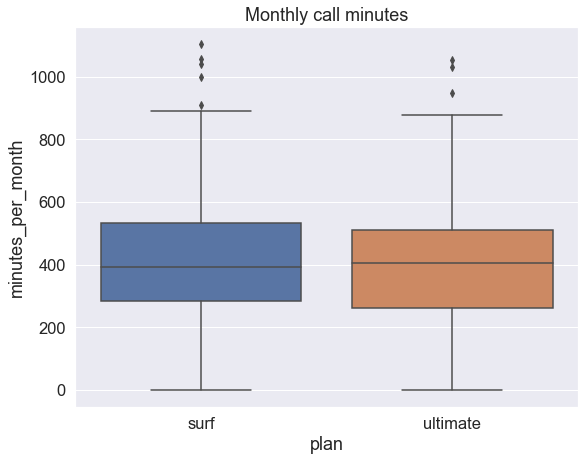

In [40]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set(font_scale=1.5)
sns.boxplot(data=plan_users,x='plan' , y='minutes_per_month').set(title='Monthly call minutes')
plt.show()

- The mean monthly call minutes of the 'ultimate' plan users is slightly higher than that of the 'surf' plan users (401.5 vs 397.8 respectively). 
- at least 25% of the 'surf' plan users exceed their call minutes allowance whereas non of the 'ultimate' users exceed theirs. 

### Mean monthly revenue per plan

In [41]:
plan_users.groupby('plan')['mean_monthly_revenue'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,339.0,55.768598,42.692637,20.0,24.365079,43.52,70.0,311.140000
ultimate,161.0,71.777985,7.336894,70.0,70.000000,70.00,70.0,121.333333


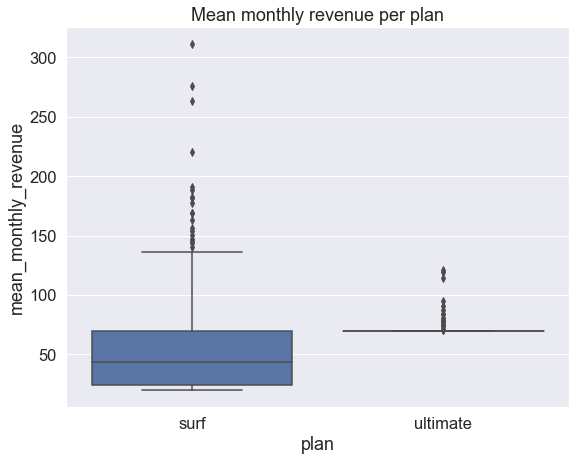

In [42]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set(font_scale=1.5)
sns.boxplot(data=plan_users,x='plan' , y='mean_monthly_revenue').set(title='Mean monthly revenue per plan')
plt.show()

- The variability in the 'surf' monthly revenue distribution is 6 times greater than that of the 'ultimate' plan due to higher outliers.
- In 75% of the users of both plans, the mean monthly revenue is the same: 70 usd, however the overall mean monthly revenue is higher in the 'ultimate' plan compared to the 'surf' plan (71.8 usd vs 55.8 usd respectively). 

#### Testing the claim that the mean monthly revenue of the 2 plans are different

- #### null hypothesis- H0: there is NO difference between the average revenues of the 2 plans.  
- #### alternative hypothesis- H1: there IS a difference between the average revenues of the 2 payment plans.

- calculating the plan revenue mean and variance:

In [43]:
plan_users.groupby('plan')['mean_monthly_revenue'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,339.0,55.768598,42.692637,20.0,24.365079,43.52,70.0,311.140000
ultimate,161.0,71.777985,7.336894,70.0,70.000000,70.00,70.0,121.333333


- for alpha = 0.5:

In [44]:
alpha=0.05
surf= plan_users.query('plan=="surf"').mean_monthly_revenue             
ultimate= plan_users.query('plan=="ultimate"').mean_monthly_revenue

- The ttest_ind function (for 2 independant samples) is used, setting the 'equal_var' parameter to False, since the samples variances are substantially different:

In [45]:
results= st.ttest_ind(surf, ultimate, equal_var=False)
pvalue=results.pvalue
print('pvalue:', pvalue.round(11))

pvalue: 8e-11


In [46]:
if pvalue < alpha:
    print("The null hypothesis is rejected")
else:
    print("The null hypothesis cannot be rejected") 

The null hypothesis is rejected


### Plan Revenue- conclusion:  
- it appearse that the use of communication chanels is mostly unaffected by the payment plan. in other words, people will consume the amount of call- minutes, messages and internet volume, regardless of the type of payment plan they are registered to. 
- as can be seen, both distributions are fairly simillar, with very close means and standard deviations in all 3 channels of communication: call minutes, text messages and internet usage.   
- people in the 'surf' plan exceed their volume limit in all 3 communication channels, whereas there is no general exceedance in the 'ultimate' group, with the exception of less than 1% of exceedance in internet use. 
- The mean monthly revenue is higher in the 'ultimate' plan compared to the 'surf' plan (71.8 usd vs 55.8 usd respectively). This conclussion was further supported by Welch’s t-test for an alpha value of 0.05.

#### Testing the claim that mean monthly revenue of users in NY-NJ area is different from that of the users from other regions.

- #### null hypothesis- H0: there is NO difference between the average revenues of people from the NY-NJ are and those from other places.  
- #### alternative hypothesis- H1: there IS a difference between the average revenues of people living in NY-NJ are vs elsewhere.

- mean monthly revenue and variance of people living in NY-NJ: 

In [47]:
ny_nj= revenue_per_month.query('city=="New York-Newark-Jersey City, NY-NJ-PA MSA"')
round(ny_nj.groupby('city')['monthly_revenue'].agg(['mean', 'var']).reset_index(),2)

,city,mean,var
0,"New York-Newark-Jersey City, NY-NJ-PA MSA",58.6,1858.9


- calculating the average revenue and variance for the people living outside of NY-NJ: 

In [48]:
rest_of_people= revenue_per_month.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')
mean_var_rest= rest_of_people.describe().T.loc[['monthly_revenue'],:]
print('The mean revenue for people outside of NY-NJ:', round(mean_var_rest.reset_index()['mean'].values[0], 2))
print('The variance of revenue for people outside of NY-NJ:', round((mean_var_rest.reset_index()['std'].values[0])**2, 2))


The mean revenue for people outside of NY-NJ: 63.85
The variance of revenue for people outside of NY-NJ: 2163.29


- in this case, the variance of both the population sample (people living in and out of NJ-NY), are fairly simillar. we will therefore set the 'equal_var' parameter to True and use the st.ttest_ind() method for 2 independant samples, AGAIN WITH alpha=0.05:

In [49]:
ny_nj_people= ny_nj.groupby('user_id')['monthly_revenue'].mean()
non_ny_nj_people= rest_of_people.groupby('user_id')['monthly_revenue'].mean()

In [50]:
alpha=0.05
results_second_hypothesis= st.ttest_ind(ny_nj_people, non_ny_nj_people)
pvalue_second=results_second_hypothesis.pvalue
print('pvalue:', pvalue_second.round(2))

pvalue: 0.55


In [51]:
if pvalue_second < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

We can't reject the null hypothesis


### conclusion: 
- because pvalue is bigger then our designated alpha value, the null hypothesis cannot be rejected, meaning: there is NO evidence to suggest a difference between the revenues of people living in ny-nj VS people living in other places. 

## Overall conclusions:  
- the consumer behavior of both payment plans is very simillar, which can be seen in the distributions of call minutes, messages and internet volume for people in each plan.  
- in both plans, people do not tend on average, to exceed their package limits.   
- the hypothesis analysis indicates that the 'ultimate' paying plan has higher revenue than the 'surf' one. this is to be expected in light of the fact that people tend on average to not exceed their package limits + the higher monthly payment in the 'ultimate' plan than that charged in the 'surf' plan.  
- there was no statistical evidence to support differences in revenue, based on people living in Vs out of the NY-NJ area. the null hypothesis that there's NO difference, could not be rejected.